### figure 2 - sex-specific heritability and genetic correlation of biomarkers and other traits

In [1]:
# load packages and dependencies
require('tidyverse')
require('reshape2')  # for dcast 

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: reshape2

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [33]:
# read in all the ss biomarker data
BIOMARKER.DIR <- "../../data/1015/m1/"
biomarker_traits <- list.files(BIOMARKER.DIR, pattern="f_\\D*")

biomarkers <- sapply(biomarker_traits, function(x) strsplit(strsplit(x, "f_",fixed=TRUE)[[1]][[2]], ".RData")[[1]][[1]])

biomarkers2 <- setdiff(biomarkers , c("arm_fp", "leg_fp", "trunk_fp", "whr"))
biomarkers2
length(biomarkers2) # 35 biomarkers

# column names depend on the dimension
# t(c(trait, dat$dat$N, unlist(m1.pi), unlist(m1.Sigma), unlist(rg), unlist(rg.c$l), unlist(rg.c$u), unlist(h)))
# rg.l and rg.u are the 95% CI for rg
m1.cols <-  c("trait", "n", "pi[1]", "pi[2]", "Sigma[1,1]", "Sigma[1,2]", "Sigma[2,1]", "Sigma[2,2]", "rg", "rg.l", "rg.u", "h.f", "h.m")

biomarker_df <- do.call(rbind, lapply(biomarkers2, function(x) read.table(sprintf("%s/summary_dat_%s_2_.txt", BIOMARKER.DIR, x), sep=" ", header=TRUE)))
colnames(biomarker_df) <- m1.cols
head(biomarker_df)
    


[1] "Alanine_aminotransferase"        "Albumin"                        
 [3] "Alkaline_phosphatase"            "Apolipoprotein_A"               
 [5] "Apolipoprotein_B.adjust.statins" "Apolipoprotein_B"               
 [7] "Aspartate_aminotransferase"      "C_reactive_protein"             
 [9] "Calcium"                         "Cholesterol.adjust.statins"     
[11] "Cholesterol"                     "Creatinine_in_urine"            
[13] "Creatinine"                      "Cystatin_C"                     
[15] "Direct_bilirubin"                "eGFR"                           
[17] "Fasting_glucose"                 "Gamma_glutamyltransferase"      
[19] "Glucose"                         "Glycated_haemoglobin_HbA1c"     
[21] "HDL_cholesterol"                 "IGF_1"                          
[23] "LDL_direct.adjust.statins"       "LDL_direct"                     
[25] "Lipoprotein_A"                   "Microalbumin_in_urine"          
[27] "Non_albumin_protein"             "Oestradiol"                     
[29] "Phosphate"                       "Potassium_in_urine"             
[31] "Rheumatoid_factor"               "SHBG"                           
[33] "Sodium_in_urine"                 "Testosterone"                   
[35] "Total_bilirubin"                 "Total_protein"                  
[37] "Urate"                           "Urea"                           
[39] "Vitamin_D"

[1] 39

trait,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u,h.f,h.m
Alanine_aminotransferase,185830,0.9278233,0.072176681,7.171212e-05,6.934385e-05,6.934385e-05,8.026258e-05,0.9140675,0.8918961,0.9357448,NA,NA
Albumin,185176,0.8741166,0.125883423,4.366686e-05,4.238062e-05,4.238062e-05,4.326505e-05,0.9752237,0.9527401,0.9930145,NA,NA
Alkaline_phosphatase,185835,0.9919450,0.008054994,9.269005e-03,1.050801e-02,1.050801e-02,1.194561e-02,0.9986591,0.9981819,0.9990334,NA,NA
Apolipoprotein_A,185159,0.9793958,0.020604221,6.288996e-04,6.567083e-04,6.567083e-04,7.070754e-04,0.9848183,0.9798631,0.9892995,NA,NA
Apolipoprotein_B.adjust.statins,185788,0.9840625,0.015937455,1.261674e-03,1.168401e-03,1.168401e-03,1.104964e-03,0.9895991,0.9864116,0.9922658,NA,NA
Apolipoprotein_B,185793,0.9913960,0.008603986,1.409642e-03,1.181322e-03,1.181322e-03,1.015093e-03,0.9875976,0.9830573,0.9915109,NA,NA


In [34]:

# need to read in a key and change the codes
phe_codes <- read_csv("../../data/ListPheCodes.csv")
head(phe_codes)
phe_codes <- phe_codes %>% 
mutate(variable_name=str_replace_all(variable_name, " ", "_")) %>%
mutate(trait=str_replace(trait, "INI", ""))
phe_codes %>% filter(variable_name=="Testosterone")

Parsed with column specification:
cols(
  trait = col_character(),
  category = col_character(),
  variable_name = col_character(),
  readable_name = col_character()
)


trait,category,variable_name,readable_name
3140,sex specific,pregnant,pregnant
2724,sex specific,menopause,menopause
3581,sex specific,menopause_age,age menopause
3591,sex specific,hysterectomy,hysterectomy
2934,sex specific,oophorectomy,oophorectomy
3700,sex specific,time_since_period,time since last menstrual period


trait,category,variable_name,readable_name
30850,biomarker,Testosterone,NA


In [5]:
phe_codes$trait

[1] "3140"     "2724"     "3581"     "3591"     "2934"     "3700"    
  [7] "3710"     "3720"     "2804"     "3546"     "2178"     "2188"    
 [13] "whr"      "21001"    "50"       "48"       "49"       "4079"    
 [19] "4080"     "20150"    "3063"     "3064"     "FEV_FVC"  "23100"   
 [25] "23116"    "23112"    "23124"    "23120"    "23128"    "23099"   
 [31] "23105"    "23115"    "23111"    "23123"    "23119"    "23127"   
 [37] "23100"    "23101"    "23102"    "23106"    "23107"    "23108"   
 [43] "23109"    "23110"    "trunk_fp" "leg_fp"   "arm_fp"   "46"      
 [49] "47"       "20015"    "20019"    "20021"    "20022"    "20150"   
 [55] "20151"    "21021"    "30000"    "30010"    "30020"    "30030"   
 [61] "30040"    "30050"    "30060"    "30070"    "30080"    "30090"   
 [67] "30100"    "30110"    "30120"    "30130"    "30140"    "30150"   
 [73] "30160"    "30170"    "30180"    "30190"    "30200"    "30210"   
 [79] "30220"    "30230"    "30240"    "30250"    "30260"    "30270"   
 [85] "30280"    "30290"    "30300"    "30500"    "30510"    "30520"   
 [91] "30530"    "30620"    "30600"    "30610"    "30630"    "30640"   
 [97] "30650"    "30710"    "30680"    "30690"    "30700"    "30720"   
[103] "30660"    "30730"    "30740"    "30750"    "30760"    "30770"   
[109] "30780"    "30790"    "30800"    "30810"    "30820"    "30830"   
[115] "30850"    "30840"    "30860"    "30870"    "30880"    "30670"   
[121] "30890"    "30510"

In [35]:
setdiff(as.character(biomarker_df$trait), phe_codes$variable_name)
setdiff(filter(phe_codes, category=="biomarker")$variable_name,as.character(biomarker_df$trait))

## TODO: looks like we're missing hbA1C and IGF-1 <-- go back and redo these!

length(intersect(as.character(biomarker_df$trait), phe_codes$variable_name)) # 32

# added this one: 30510, biomarker, Creatinine_in_urine, NA; fixed CRP

## TODO: what is going on w "Fasting_glucose", "eGFR", "Non_albumin_protein" <-- are these derived?
##  these are phenotypes we somehow have but didn't know abt?
##  consider the statin-adjusted too



[1] "Apolipoprotein_B.adjust.statins" "Cholesterol.adjust.statins"     
[3] "eGFR"                            "Fasting_glucose"                
[5] "Glycated_haemoglobin_HbA1c"      "IGF_1"                          
[7] "LDL_direct.adjust.statins"       "Non_albumin_protein"

[1] "Glycated_haemoglobin_(HbA1c)" "IGF-1"                       
[3] "Triglycerides"

[1] 31

In [36]:
biomarker_df2 <- right_join(phe_codes %>% select(trait, category, variable_name), 
                            biomarker_df %>% rename(variable_name=trait))  %>%
mutate(category="biomarker", trait=ifelse(is.na(trait), variable_name, trait))  %>% select(-h.f, -h.m) 

head(biomarker_df2)

Joining, by = "variable_name"
Warning message:
“Column `variable_name` joining character vector and factor, coercing into character vector”

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg,rg.l,rg.u
30620,biomarker,Alanine_aminotransferase,185830,0.9278233,0.072176681,7.171212e-05,6.934385e-05,6.934385e-05,8.026258e-05,0.9140675,0.8918961,0.9357448
30600,biomarker,Albumin,185176,0.8741166,0.125883423,4.366686e-05,4.238062e-05,4.238062e-05,4.326505e-05,0.9752237,0.9527401,0.9930145
30610,biomarker,Alkaline_phosphatase,185835,0.9919450,0.008054994,9.269005e-03,1.050801e-02,1.050801e-02,1.194561e-02,0.9986591,0.9981819,0.9990334
30630,biomarker,Apolipoprotein_A,185159,0.9793958,0.020604221,6.288996e-04,6.567083e-04,6.567083e-04,7.070754e-04,0.9848183,0.9798631,0.9892995
Apolipoprotein_B.adjust.statins,biomarker,Apolipoprotein_B.adjust.statins,185788,0.9840625,0.015937455,1.261674e-03,1.168401e-03,1.168401e-03,1.104964e-03,0.9895991,0.9864116,0.9922658
30640,biomarker,Apolipoprotein_B,185793,0.9913960,0.008603986,1.409642e-03,1.181322e-03,1.181322e-03,1.015093e-03,0.9875976,0.9830573,0.9915109


[1] "h_err_Alanine_aminotransferase_2_.txt"  
 [2] "h_err_Albumin_2_.txt"                   
 [3] "h_err_Aspartate_aminotransferase_2_.txt"
 [4] "h_err_C_reactive_protein_2_.txt"        
 [5] "h_err_Calcium_2_.txt"                   
 [6] "h_err_Cholesterol_2_.txt"               
 [7] "h_err_Cholesterol.adjust.statins_2_.txt"
 [8] "h_err_Creatinine_2_.txt"                
 [9] "h_err_Cystatin_C_2_.txt"                
[10] "h_err_eGFR_2_.txt"                      
[11] "h_err_Gamma_glutamyltransferase_2_.txt" 
[12] "h_err_Microalbumin_in_urine_2_.txt"     
[13] "h_err_Non_albumin_protein_2_.txt"       
[14] "h_err_Phosphate_2_.txt"                 
[15] "h_err_Rheumatoid_factor_2_.txt"         
[16] "h_err_Testosterone_2_.txt"              
[17] "h_err_Total_protein_2_.txt"             
[18] "h_err_Urate_2_.txt"                     
[19] "h_err_Urea_2_.txt"                      
[20] "h_err_Vitamin_D_2_.txt"

In [41]:
biomarker_err <- do.call(rbind, lapply(list.files(BIOMARKER.DIR, pattern="h_err*")
, function(f) 
    read_tsv(sprintf("%s/%s", BIOMARKER.DIR, f))))
head(biomarker_err)
length(unique(biomarker_err$trait))
length(biomarkers2)

    


Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_double()
)
Parsed with column specification:
cols(
  trait = col_character(),
  int = col_character(),
  sex = col_character(),
  value = col_character()
)


trait,int,sex,value
Alanine_aminotransferase,up,hf,NA
Alanine_aminotransferase,low,hf,NA
Alanine_aminotransferase,center,hf,NA
Alanine_aminotransferase,up,hm,NA
Alanine_aminotransferase,low,hm,NA
Alanine_aminotransferase,center,hm,NA


[1] 38

[1] 39

In [42]:
biomarker_err_df <- right_join(phe_codes %>% select(trait, category, variable_name), biomarker_err %>% 
                               rename(variable_name=trait))
biomarker_err_df2 <- biomarker_err_df %>% mutate( category="biomarker", 
                            trait=ifelse(is.na(trait), variable_name, trait)) 
#biomarker_err_df[is.na(category)]$category <- "biomarker"
#head(biomarker_err_df)


Joining, by = "variable_name"


In [43]:
table(is.na(biomarker_err$value))
# TODO: these traits  do not have heritability estimates - what is going on?


FALSE  TRUE 
  216    12 

In [44]:
# write out all the aggregated files

biomarker_err_wide <- biomarker_err_df2 %>% 
mutate("h_type"=paste(sex, substr(int, 1, 1), sep=".")) %>% 
select(-int, -sex) %>% spread(h_type, value) 


#alt_err_wide <- alt_err2 %>% 
#mutate("h_type"=paste(sex, substr(int, 1, 1), sep=".")) %>% 
#select(-int, -sex) %>% spread(h_type, value) 

In [45]:
#alt_full <- alt_df2 %>% rename(rg.c=rg) %>% 
#full_join(select(alt_err_wide, c(-category, -variable_name)), by="trait") %>% unique()


biomarker_full <- biomarker_df2 %>% rename(rg.c=rg) %>% 
full_join(select(biomarker_err_wide, c(-category, -variable_name)), by="trait") %>% unique()

m1_full <- biomarker_full #rbind(biomarker_full, alt_full)
unique(m1_full$category)
m1_full$category[m1_full$category=="fat distribution"] <- "anthropometric"
m1_full$category[m1_full$category=="anthropometric traits"] <- "anthropometric"
m1_full$category[m1_full$category=="urinalysis"] <- "biomarker"
m1_full$category[m1_full$category %in% c("breathing", "hearing test", "lab test", "physical test")] <- "other"

#write_csv(biomarker_full, "../../data/aggreg_results_1011/m1_biomarker.txt")
#write_csv(m1_full, "../../data/aggreg_results_1011/m1_full.txt")



[1] "biomarker"

### CHECKING FAILED RUNS

In [46]:
 

# which are NAs?
# which have crazy CIs?
# do we have an intuition for why this is?
rg_bad <- m1_full %>% filter(rg.u > 1 | rg.l <  0) %>% select(variable_name)
rg_bad$variable_name
h_bad <- m1_full[apply(m1_full, 1, function(x) any(is.na(x)) | any(is.na(x))),] %>% select(variable_name)
h_bad$variable_name


[1] "Fasting_glucose"       "Microalbumin_in_urine" "Rheumatoid_factor"

[1] "Alanine_aminotransferase"   "Aspartate_aminotransferase"
[3] "Fasting_glucose"

In [47]:

m1_full %>% 
filter(trait %in% m1_full[duplicated(m1_full$trait),]$trait) %>% 
arrange(trait)
 # no duplicates

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u


In [57]:
bad_ci <- m1_full %>% filter(
hf.u < hf.c |
hf.c < hf.l |
hm.u < hm.c |
hm.c < hm.l) 
dim(bad_ci)
bad_ci2 <- bad_ci %>% filter(!hf.u < hf.l & ! hm.u < hm.l)
bad_ci2

hmc <- m1_filt[m1_filt$trait=="eGFR",]$hm.c 
hml <- m1_filt[m1_filt$trait=="eGFR",]$hm.l

m1_filt[m1_filt$trait=="eGFR",]$hm.c <- hml
m1_filt[m1_filt$trait=="eGFR",]$hm.l <- hmc


[1]  3 19

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u
eGFR,biomarker,eGFR,186055,0.809403,0.190597,4.8273e-05,4.210828e-05,4.210828e-05,4.354333e-05,0.9185215,0.8993869,0.9380572,0.215340595195289,0.201009248881113,0.226333726211856,0.173998666689131,0.175667252341022,0.180281674505046


In [48]:
biomarkers.poor <- c("Oestradiol", "Fasting_glucose", "Microalbumin_in_urine", "Rheumatoid_factor")
m1_filt <- m1_full %>% filter(!variable_name %in% biomarkers.poor)
length(unique(m1_filt$variable_name))

[1] 35

### PLOTTING NOW

In [49]:
# what are the pis ?
m1_filt%>% filter(`pi[1]` > 0.99) # should we remove these?

trait,category,variable_name,n,pi[1],pi[2],"Sigma[1,1]","Sigma[1,2]","Sigma[2,1]","Sigma[2,2]",rg.c,rg.l,rg.u,hf.c,hf.l,hf.u,hm.c,hm.l,hm.u
30610,biomarker,Alkaline_phosphatase,185835,0.9919450,0.0080549937,0.0092690054,0.0105080142,0.0105080142,0.011945614,0.9986591,0.9981819,0.9990334,0.18495289237796,0.154888652869398,0.213670592464987,0.196016606676001,0.167148558609726,0.234350510189517
30640,biomarker,Apolipoprotein_B,185793,0.9913960,0.0086039865,0.0014096421,0.0011813215,0.0011813215,0.001015093,0.9875976,0.9830573,0.9915109,0.0915667326916914,0.0765811670665453,0.106311805681689,0.0604904244938026,0.0499037389802593,0.0672680622570202
30660,biomarker,Direct_bilirubin,184755,0.9981770,0.0018230252,0.0090162621,0.0088131271,0.0088131271,0.008676078,0.9964994,0.9946432,0.9979949,0.0330915812509303,0.027456956100671,0.0350610876822557,0.0311158299813006,0.0267916308395546,0.0339019097184237
30780,biomarker,LDL_direct,185866,0.9906170,0.0093830058,0.0009594104,0.0007407035,0.0007407035,0.000598921,0.9771746,0.9684706,0.9840960,0.102747014553716,0.0830414471062926,0.121965615909705,0.0579119095587373,0.0462190596988514,0.069132222229162
30790,biomarker,Lipoprotein_A,184054,0.9992051,0.0007949098,0.0790652957,0.0779270863,0.0779270863,0.077398559,0.9961706,0.9934165,0.9979622,0.0549515146607531,0.0364861255785844,0.0827239355098562,0.04373657954773,0.0297278293406762,0.0651990833173467
30840,biomarker,Total_bilirubin,185769,0.9968331,0.0031668897,0.0067545100,0.0066787923,0.0066787923,0.006621970,0.9986612,0.9978405,0.9993305,0.0475403078229668,0.0471860169667326,0.0642871891072465,0.0422981642152302,0.039468419837877,0.0558649574903968


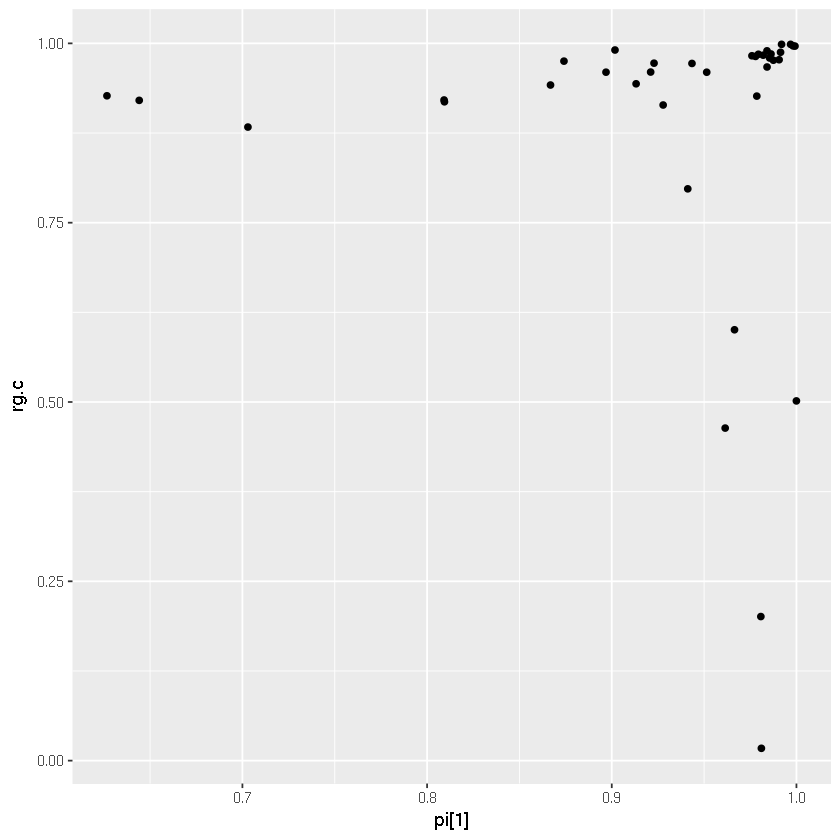

In [18]:
ggplot(m1_filt, aes(x=`pi[1]`, y=`rg.c`))+geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


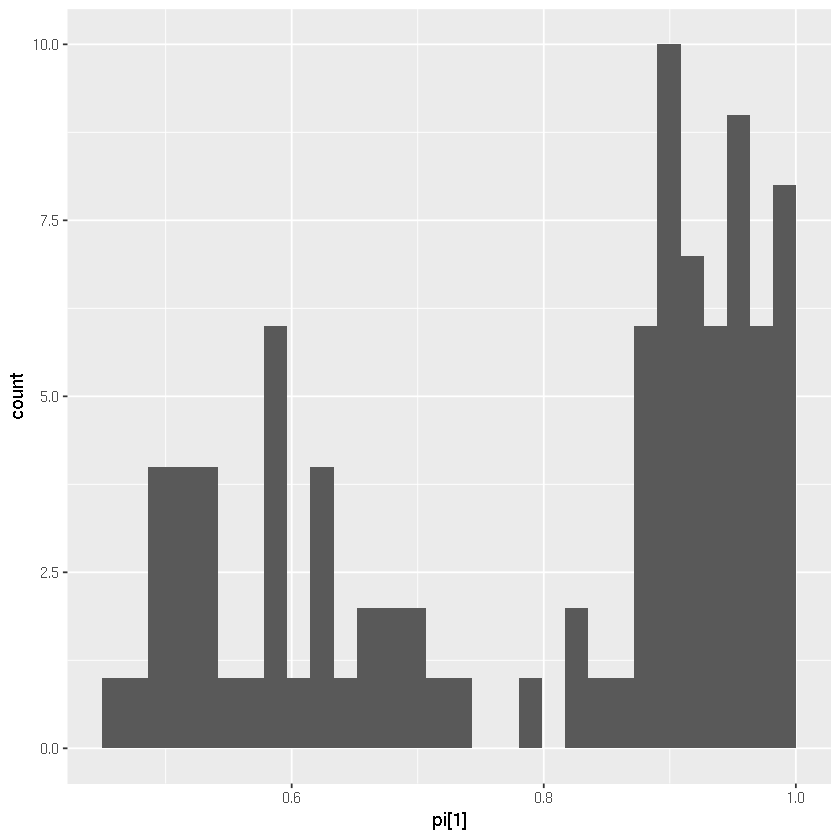

In [91]:
ggplot(m1_filt, aes(x=`pi[1]`))+geom_histogram()

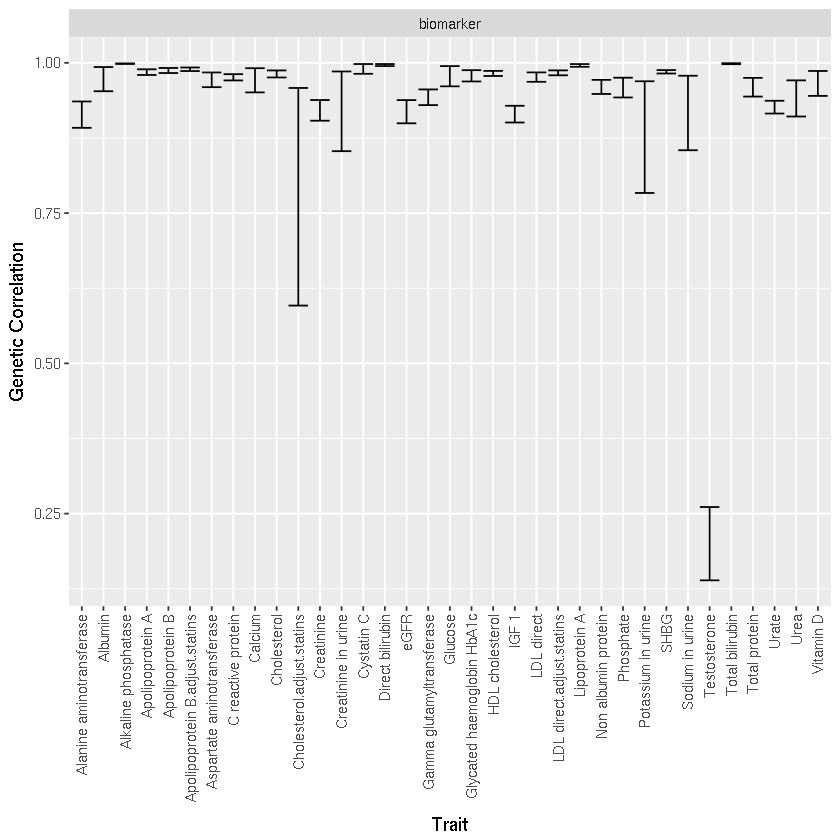

In [51]:
# plot the pis
# plot the genetic correlations

m1_filt <- m1_filt %>% mutate(variable_name=str_replace_all(variable_name, "_", " "))
ggplot(m1_filt, aes(x=variable_name, y=rg.c))+geom_errorbar(aes(ymin=rg.l, ymax=rg.u)) + 
theme(axis.text.x=element_text(angle=90,hjust=1, vjust=0.5)) +ylab("Genetic Correlation")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")

In [58]:
m1_full2 <- m1_filt %>% select(variable_name, category, c('hf.c','hm.c', 'hf.l', 'hf.u' ,'hm.l' ,'hm.u')) %>% 
gather(key="h_type", value="val", -variable_name, -category) 
m1_full2$sex <-sapply(m1_full2$h_type, function(x) strsplit(as.character(x), ".", fixed=TRUE)[[1]][[1]])
m1_full2$int <- sapply(m1_full2$h_type, function(x) strsplit(as.character(x), ".", fixed=TRUE)[[1]][[2]])
m1_full3 <- m1_full2 %>% select(-h_type) %>% unique() %>% filter(!is.na(val)) %>% mutate(val=as.numeric(val)) 


In [59]:

m1_full4 <- dcast(m1_full3, variable_name + category + sex ~ int, value.var="val", fun.aggregate = min, na.rm = TRUE)

Warning message in .fun(.value[0], ...):
“no non-missing arguments to min; returning Inf”

In [60]:
herit_df <- m1_full4 %>% rename(mid=c, low=l, up=u)  %>% 
mutate(sex=ifelse(sex=="hf", "female", ifelse(sex=="hm", "male", NA))) %>%
mutate(variable_name=str_replace_all(variable_name, "_", " "))

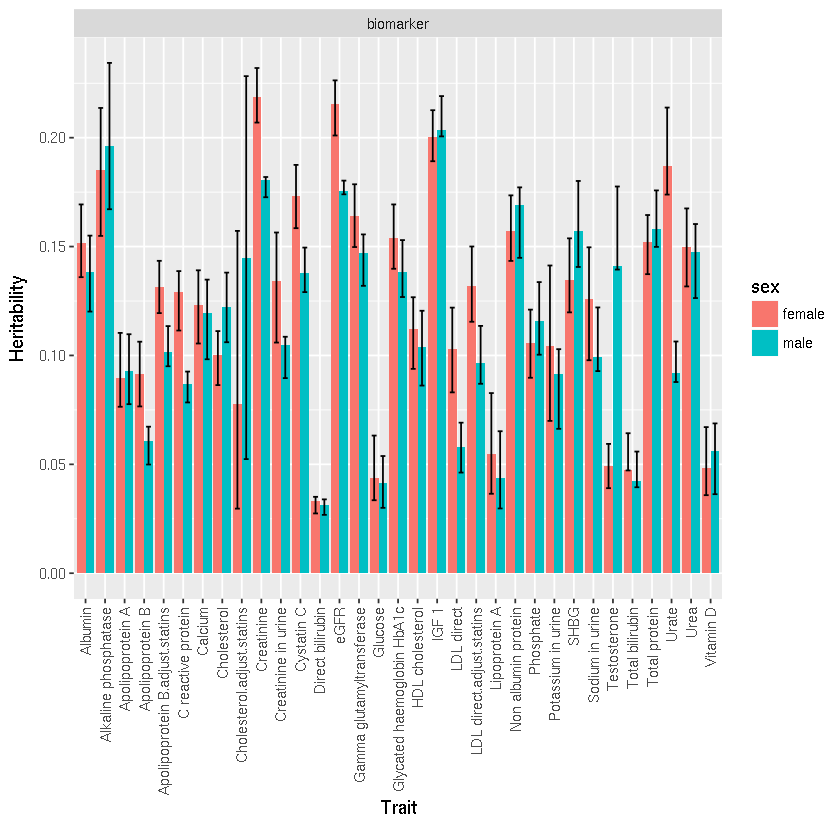

In [61]:
ggplot(filter(herit_df, category=="biomarker"), aes(x=variable_name, y=mid, fill=sex))+
geom_bar(stat="identity", position=position_dodge())+
geom_errorbar(aes(ymin=low, ymax=up), position=position_dodge(0.9), color="black", width=0.5) + 
theme(axis.text.x=element_text(angle=90,hjust=1, vjust=0.5),
     axis.title.x = element_text(margin = margin(t = 0, r = 0, b = 10, l = 0))) +ylab("Heritability")+xlab("Trait") + 
facet_grid(. ~ category,  scales="free", space="free")

In [102]:
# what is missing? what are we suspicious of?

# find all the ones with weird h.f / r.g confidence intervals
#   what is going on here?

